In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. 전처리

In [4]:
df.Sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [6]:
# replace
# male --> 0, female --> 1
df = df.replace({'male':0, 'female':1})
df.Sex

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [7]:
# 명목형 자료 변환 -> dummy 방식
df.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [8]:
# get_dummies 사용, 변환

pd.get_dummies(df.Embarked)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [15]:
# 수치형 자료 변환
# 정규화(normalization)

# 1) 정규화 함수 구현 (min-max scaling)
def normal(data):
    data = (data-data.min())/(data.max() - data.min())
    return data

In [13]:
df.Fare # 변환 전

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [17]:
df['Fare_norm'] = normal(df.Fare) # 변환 후
df['Fare_norm']

0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: Fare_norm, Length: 891, dtype: float64

In [19]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_norm
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0.139136


In [26]:
# 수치형 자료 변환
# 표준화(Standardzation)

# 1) 정규화 함수 구현 (standard())
def standard(data):
    data = (data - data.mean())/(data.std())
    return data

In [27]:
standard(df.Fare)

0     -0.502163
1      0.786404
2     -0.488580
3      0.420494
4     -0.486064
         ...   
886   -0.386454
887   -0.044356
888   -0.176164
889   -0.044356
890   -0.492101
Name: Fare, Length: 891, dtype: float64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Fare_norm    891 non-null    float64
dtypes: float64(3), int64(6), object(4)
memory usage: 90.6+ KB


In [31]:
# 1. cabin 변수 제거
df = df.drop(columns = ['Cabin'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_norm
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0.103644
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S,0.025374
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S,0.058556
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,S,0.045771
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C,0.058556


In [32]:
# 2. 결측값이 포함되어 있는 샘플 제거
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_norm
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0.103644
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,Q,0.056848
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S,0.025374
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S,0.058556
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C,0.058556


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
 11  Fare_norm    712 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 72.3+ KB


<AxesSubplot:>

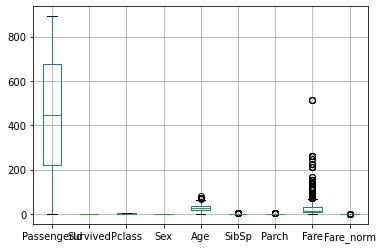

In [34]:
# 3. 이상치 처리
df.boxplot()

In [39]:
titanic = pd.read_csv('titanic.csv')

In [40]:
titanic_mod = titanic.drop(columns = ['Cabin'])

In [41]:
titanic_mod2 = titanic_mod.dropna()

In [45]:
# Age 값 - Age 내림 값(기준)
titanic_mod2[titanic_mod2.Age - np.floor(titanic_mod2.Age) > 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
57,58,0,3,"Novel, Mr. Mansouer",male,28.50,0,0,2697,7.2292,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,Q
122,123,0,2,"Nasser, Mr. Nicholas",male,32.50,1,0,237736,30.0708,C
123,124,1,2,"Webber, Miss. Susan",female,32.50,0,0,27267,13.0000,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.50,0,2,230080,26.0000,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.50,0,0,A.5. 11206,8.0500,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.50,0,2,A/5. 851,14.5000,S
203,204,0,3,"Youseff, Mr. Gerious",male,45.50,0,0,2628,7.2250,C


In [47]:
outlier = titanic_mod2[titanic_mod2.Age - np.floor(titanic_mod2.Age) > 0]['Age']

In [49]:
df_final = titanic_mod2[titanic_mod2.Age - np.floor(titanic_mod2.Age) == 0] # 정상 값(소수점이 없음)

## 2. 모델링

In [50]:
# 데이터 분리하기 (train, test)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [51]:
df_final.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [53]:
# 1. feature data, label data(지도학습)
X = df_final.drop(columns = ['Survived'])
y = df_final['Survived']

print('X의 데이터 개수:%d'%(len(X)))
print('y의 데이터 개수:%d'%(len(y)))

X의 데이터 개수:687
y의 데이터 개수:687


In [54]:
# 2. train data, test data 분리 (7:3)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
print('학습한 데이터 개수 : %d'%(len(X_train)))
print('테스트하기 위해 남겨둔 데이터 개수 : %d'%(len(X_test)))

학습한 데이터 개수 : 480
테스트하기 위해 남겨둔 데이터 개수 : 207
